In [1]:
import limb
import pandas as pd
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
gaitdata=pd.read_csv('interpolated_data.csv', sep=',')

In [3]:
time=gaitdata.loc[:,"TIME"]

In [4]:
anthdat=limb.AnthroData(54.5,170)

In [5]:
ls=anthdat[8]/100
lt=anthdat[4]/100
lh=anthdat[16]/100
lf=anthdat[12]/100
lcu=anthdat[1]/100
lcs=anthdat[9]/100
lct=anthdat[5]/100
lch=anthdat[17]/100
lcf=anthdat[13]/100
If=anthdat[14]/10000
Is=anthdat[10]/10000
Ih=anthdat[18]/10000
It=anthdat[6]/10000
Iu=anthdat[2]/10000
mf=anthdat[11]
ms=anthdat[7]
mh=anthdat[15]
mt=anthdat[3]
mu=anthdat[0]

In [84]:
Txp=gaitdata.loc[:,"M000Y"]
Typ=gaitdata.loc[:,"M000Z"]
Mxp=gaitdata.loc[:,"M001Y"]
Myp=gaitdata.loc[:,"M001Z"]
Bxp=gaitdata.loc[:,"M002Z"]
Byp=gaitdata.loc[:,"M002Y"]
Axp=gaitdata.loc[:,"M003Y"]
Ayp=gaitdata.loc[:,"M003Z"]
Kxp=gaitdata.loc[:,"M004Y"]
Kyp=gaitdata.loc[:,"M004Z"]
Hxp=gaitdata.loc[:,"M005Y"]
Hyp=gaitdata.loc[:,"M005Z"]
Gxp=gaitdata.loc[:,"M006Y"]
Gyp=gaitdata.loc[:,"M006Z"]

In [34]:
def Toe():
    Tp=[limb.filterdata(Txp,5),limb.filterdata(Typ,5)]
    plt.subplot(221)
    plt.plot(time,Tp[0],label='Hip x'),plt.plot(time,Txp,label='Hip x')
    plt.title("Toe X")
    plt.ylabel("x(mm)")
    plt.xlabel("t(s)")
    plt.subplot(222)
    plt.plot(time,Tp[1]),plt.plot(time,Typ)
    plt.title("Toe Y")
    plt.ylabel("y(mm)")
    plt.xlabel("t(s)")
    plt.show()

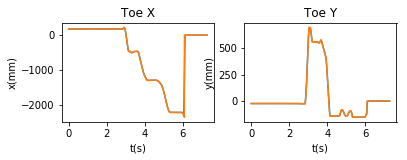

In [35]:
Toe()

In [89]:
def Metatarsophalangeal_Joint():
    Mp=[limb.filterdata(Mxp,5),limb.filterdata(Myp,5)]
    plt.subplot(211)
    plt.plot(time,Mp[0],label='a'),plt.plot(time,Mxp,label='b')
    plt.legend(loc=1)
    plt.title("Metatarsophalangeal Joint X")
    plt.ylabel("x(mm)")
    plt.xlabel("t(s)")
    plt.subplot(212)
    plt.plot(time,Mp[1]),plt.plot(time,Myp)
    plt.title("Metatarsophalangeal Joint Y")
    plt.ylabel("y(mm)")
    plt.xlabel("t(s)")
    plt.show()

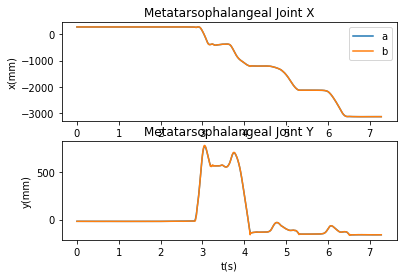

In [90]:
Metatarsophalangeal_Joint()

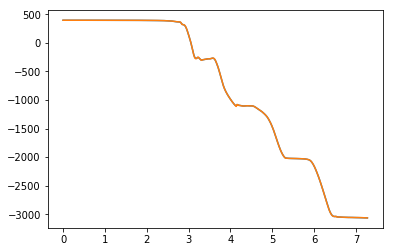

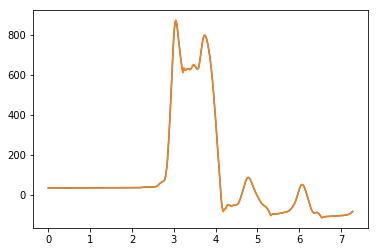

In [42]:
Ap=[limb.filterdata(Axp,5),limb.filterdata(Ayp,4)]
plt.plot(time,Ap[0]),plt.plot(time,Axp)
plt.show()
plt.plot(time,Ap[1]),plt.plot(time,Ayp)
plt.show()

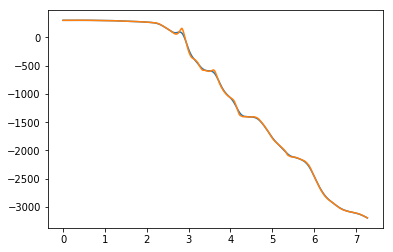

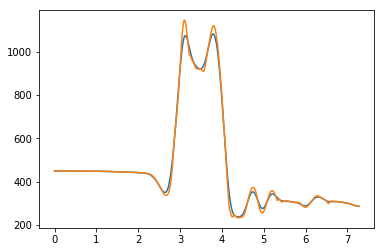

In [43]:
Kp=[limb.filterdata(Kxp,20),limb.filterdata(Kyp,20)]
plt.plot(time,Kp[0]),plt.plot(time,Kxp)
plt.show()
plt.plot(time,Kp[1]),plt.plot(time,Kyp)
plt.show()

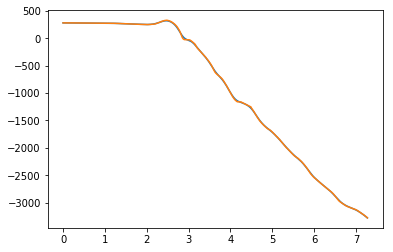

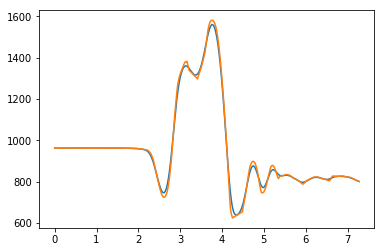

In [44]:
Hp=[limb.filterdata(Hxp,20),limb.filterdata(Hyp,20)]
plt.plot(time,Hp[0]),plt.plot(time,Hxp)
plt.show()
plt.plot(time,Hp[1]),plt.plot(time,Hyp)
plt.show()

In [45]:
mu+2*mf+2*mh+2*mt+2*ms

54.500000000000014

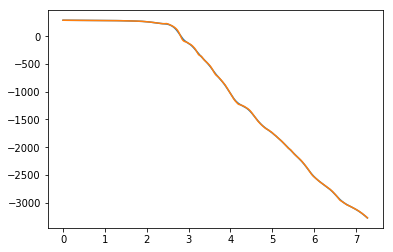

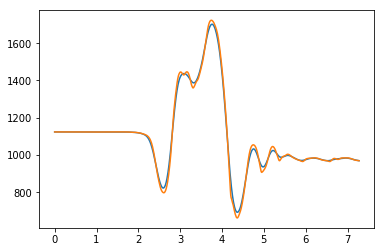

In [46]:
Gp=[limb.filterdata(Gxp,20),limb.filterdata(Gyp,20)]
plt.plot(time,Gp[0]),plt.plot(time,Gxp)
plt.show()
plt.plot(time,Gp[1]),plt.plot(time,Gyp)
plt.show()

In [83]:
Body=[limb.BodyPart(lf,mf,lcf,If,Tp,Mp),limb.BodyPart(lh,mh,lch,Ih,Mp,Ap),limb.BodyPart(ls,ms,lcs,Is,Ap,Kp),limb.BodyPart(lt,mt,lct,It,Kp,Hp),limb.BodyPart(2*lcu,mu,lcu,Iu,Hp,Gp)]
limb.BodyPart.time=time

NameError: name 'Mp' is not defined

In [40]:
GRFdata=pd.read_csv('interpolated_data.csv',sep=',')

In [49]:
Rx=GRFdata.loc[:,"Fy"]
Ry=-GRFdata.loc[:,"Fz"]

In [50]:
Rx=limb.filterdata(Rx,2)
Ry=limb.filterdata(Ry,2)

In [80]:
Rx=GRFdata.loc[:,"Fy"]
Ry=-GRFdata.loc[:,"Fz"]
Rx=limb.filterdata(Rx,2)
Ry=limb.filterdata(Ry,2)
def ForcePlateData():
    plt.subplot(211)
    plt.plot(time,Rx)
    plt.title("RX")
    plt.ylabel("Force(N)")
    plt.xlabel("t(s)")
    plt.subplot(212)
    plt.plot(time,Ry)
    plt.title("RY")
    plt.ylabel("Force(N)")
    plt.xlabel("t(s)")
    plt.show()

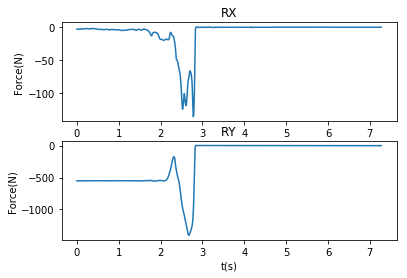

In [81]:
ForcePlateData()

The Inverse dynamics analysis is done by segmenting the body into foot, shank, thigh and the upper body is considered to be a lumped mass at the centre of mass of the upper body

*add the fbd of the whole body*

consider the foot

*add the fbd of the foot*

The kinetic diagram of the foot is as shown

*add kinetic diagram of the foot*

*add the equations here*

In [82]:
F=[Rx,Ry]
T=np.zeros(874)
R=[[np.zeros(874),np.zeros(874)],[np.zeros(874),np.zeros(874)],[np.zeros(874),np.zeros(874)],[np.zeros(874),np.zeros(874)],[np.zeros(874),np.zeros(874)]]
M=[np.zeros(874),np.zeros(874),np.zeros(874),np.zeros(874),np.zeros(874)]
for i in range(0,4):
    F,T=Body[i].Forces(F,T)
    R[i]=F
    M[i]=T

NameError: name 'Body' is not defined

In [53]:
R[0][0]-R[1][0]

array([ 0.00000000e+00, -5.42030938e-05, -2.38134957e-04, -5.92299348e-04,
       -1.12206291e-03, -1.80691879e-03, -2.56785451e-03, -3.31503704e-03,
       -3.98057108e-03, -4.46614872e-03, -4.64622994e-03, -4.41310737e-03,
       -3.71578875e-03, -2.59564093e-03, -1.20449324e-03,  2.38870969e-04,
        1.52116105e-03,  2.50094322e-03,  3.14639623e-03,  3.51977812e-03,
        3.71190933e-03,  3.77605666e-03,  3.69816555e-03,  3.40449326e-03,
        2.80694860e-03,  1.87166317e-03,  6.62307884e-04, -6.68107086e-04,
       -1.91875845e-03, -2.89748086e-03, -3.47646779e-03, -3.61754610e-03,
       -3.35700846e-03, -2.77371293e-03, -1.96130554e-03, -1.01063569e-03,
       -9.86579913e-06,  9.40507902e-04,  1.72096787e-03,  2.20776146e-03,
        2.29935834e-03,  1.94801535e-03,  1.19051766e-03,  1.55221494e-04,
       -9.64130472e-04, -1.94956631e-03, -2.60427401e-03, -2.79937126e-03,
       -2.50245335e-03, -1.77623690e-03, -7.58544406e-04,  3.69410943e-04,
        1.42399757e-03,  

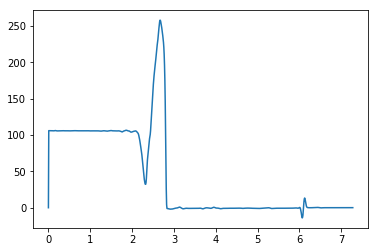

In [56]:
plt.plot(time,M[1])


Consider the shank

*add FBD of shank*

*add kinetic diagram*

consider the thigh

*add FBD of thigh*

*add kinetic diagram*

In [22]:
2*limb.BodyPart.accelCoM(Body[4])

[array([ 1.08420217e-19, -1.17356459e-03, -1.58515906e-03, -7.88827283e-04,
         1.32961314e-03,  4.54791602e-03,  8.32132058e-03,  1.20017523e-02,
         1.50521268e-02,  1.70693472e-02,  1.78165160e-02,  1.72477387e-02,
         1.54731157e-02,  1.27141606e-02,  9.28520302e-03,  5.54737627e-03,
         1.85089806e-03, -1.51768563e-03, -4.37141508e-03, -6.63431834e-03,
        -8.32728793e-03, -9.53749814e-03, -1.03863475e-02, -1.10039996e-02,
        -1.15102519e-02, -1.20014776e-02, -1.25408684e-02, -1.31474064e-02,
        -1.37879092e-02, -1.43793429e-02, -1.48034642e-02, -1.49339503e-02,
        -1.46704662e-02, -1.39653700e-02, -1.28327595e-02, -1.13368963e-02,
        -9.56230759e-03, -7.57959192e-03, -5.42546066e-03, -3.10479826e-03,
        -6.14358173e-04,  2.01984720e-03,  4.71250946e-03,  7.31410916e-03,
         9.63345763e-03,  1.14828580e-02,  1.27321425e-02,  1.33472510e-02,
         1.33987561e-02,  1.30405888e-02,  1.24652500e-02,  1.18509379e-02,
         1.1

In [23]:
a=np.add(Body[4].accelCoM,Body[4].accelCoM)

In [24]:
def aCoM(m1,a1,m2,a2,m3,a3,m4,a4,m5,a5):
    acom=[np.zeros(874),np.zeros(874)]
    F=[np.zeros(874),np.zeros(874)]
    for i in range(0,2):
        for j in range(0,874):
            acom[i][j]=(m1*a1[i][j]+m2*a2[i][j]+m3*a3[i][j]+m4*a4[i][j]+m5*a5[i][j])/(m1+m2+m3+m4+m5)
            F[i][j]=(m1+m2+m3+m4+m5)*(9.81+acom[i][j])
    return F

In [25]:
F=aCoM(Body[0].mass,Body[0].accelCoM,Body[1].mass,Body[1].accelCoM,Body[2].mass,Body[2].accelCoM,Body[3].mass,Body[3].accelCoM,Body[4].mass,a)


In [29]:
#filter the Joint forces and moments
#find the joint angles and joint omegas.

In [26]:
F[0]=limb.filterdata(F[0],3)
F[1]=limb.filterdata(F[1],3)

([<matplotlib.lines.Line2D at 0xb872147b38>],
 [<matplotlib.lines.Line2D at 0xb872147f60>])

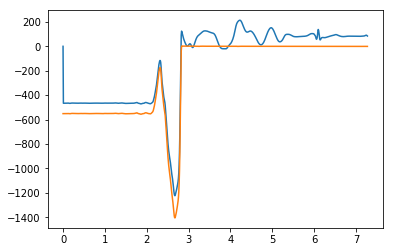

In [64]:
plt.plot(time,F[1]),plt.plot(time,Ry)

In [57]:
Power=[np.zeros(874),np.zeros(874),np.zeros(874),np.zeros(874)]

In [58]:
Power[0]=limb.Power(Body[0].omega,Body[1].omega,M[0])
Power[1]=limb.Power(Body[1].omega,Body[2].omega,M[1])
Power[2]=limb.Power(Body[2].omega,Body[3].omega,M[2])
Power[3]=limb.Power(Body[3].omega,np.zeros(874),M[3])

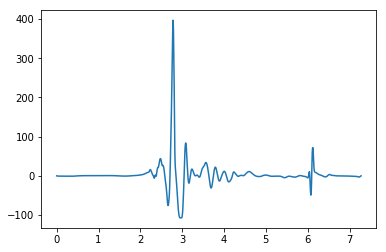

In [63]:
plt.plot(time,Power[3])